In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data from the csv file
df = pd.read_csv("ABC_company.csv")
# print(df.head())

In [ ]:
# Preprocessing:
# Replace height with random values between 150–180.
#sets the starting point (seed value) for NumPy’s random number genera`tor.
np.random.seed(42)  # The random numbers generated will be exactly the same every time you run the notebook
df['Height'] = np.random.randint(150, 181, size=len(df))    


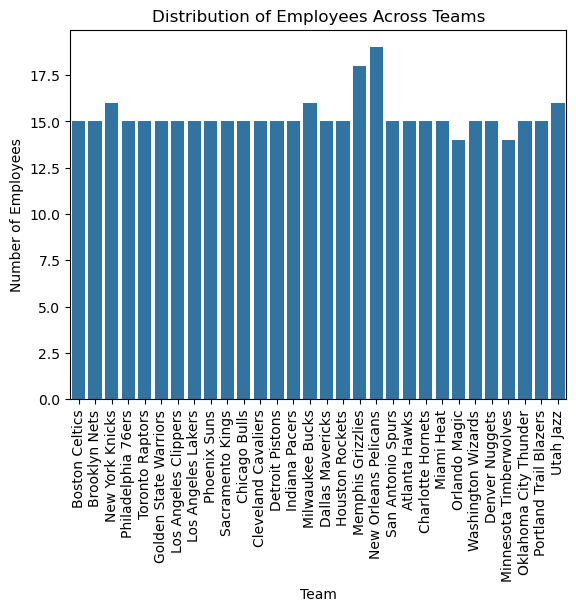

Oberervations:
1. New Orleans Pelicans has the highest number of employees, followed by Memphis Grizzlies.
2. The distribution of employees across teams is uneven, with some teams having significantly more employees than others.



In [90]:
# Analysis:
#Distribution of Employees Across Teams
team_count = df["Team"].value_counts()
# print(team_count)
total_employees = len(df)
team_percentage = ((team_count / total_employees) * 100).round(2)
team_percentage = team_percentage.astype(str) + "%"
# print(team_percentage)
#Graphical Representation:
# 1.Distribution of Employees Across Teams
sns.countplot(data=df, x="Team")
plt.title("Distribution of Employees Across Teams")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.xticks(rotation=90)
plt.show()

print("Oberervations:")
print("1. New Orleans Pelicans has the highest number of employees, followed by Memphis Grizzlies.")
print("2. The distribution of employees across teams is uneven, with some teams having significantly more employees than others.\n")



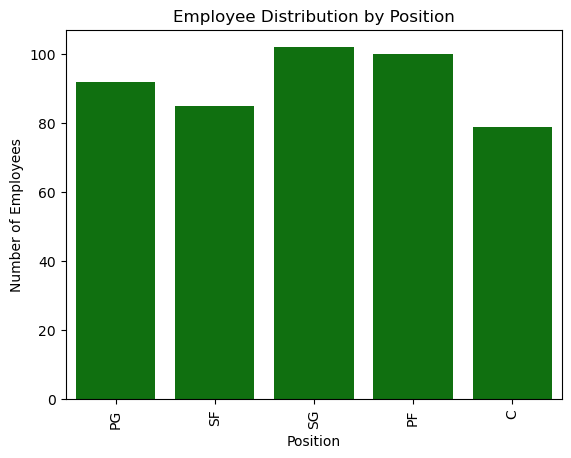

In [82]:
#Segregate Employees by Position
emp_position = df["Position"].value_counts()
# print(emp_position)
plt.figure()
sns.countplot(data=df, x="Position",color="green")
plt.title("Employee Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.xticks(rotation=90)
plt.show()
print("Observations:")
print("1. The position SG has the highest number of employees among all positions.")
print("2. Positions like PG, PF, and C have fewer employees compared to SG, indicating a possible preference for SG roles in the company.\n")

Predominant Age Group is: 25-30


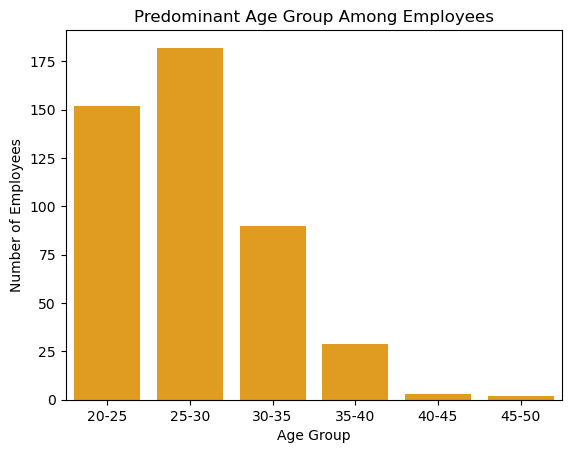

Observations:
1. The predominant age group among employees is 25-30, indicating that the company has a relatively young workforce.
2.The age group 45-50 has the least number of employees, suggesting that there may be fewer older employees in the company.



In [96]:
#Identify the predominant age group among employees.
from collections import Counter
ages = df["Age"]
age_groups = []
for age in ages:
    if age >= 20 and age < 25:
        age_groups.append("20-25")
    elif age >= 25 and age < 30:
        age_groups.append("25-30")
    elif age >= 30 and age < 35:
        age_groups.append("30-35")
    elif age >= 35 and age < 40:
        age_groups.append("35-40")
    elif age >= 40 and age < 45:
        age_groups.append("40-45")
    else:
        age_groups.append("45-50")
# print(age_groups)
age_count = Counter(age_groups)
# print(age_count)
predominant_group = max(age_count, key=age_count.get)
print("Predominant Age Group is:", predominant_group)
age_group_df = pd.DataFrame({
    "Age Group": age_count.keys(),
    "Count": age_count.values()
})
age_group_df = age_group_df.sort_values(
    by="Age Group",
    key=lambda x: x.str.split("-").str[0].astype(int)
)
sns.barplot(data=age_group_df, x="Age Group", y="Count", color="orange")
plt.title("Predominant Age Group Among Employees")  
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.show()
print("Observations:")
print("1. The predominant age group among employees is 25-30, indicating that the company has a relatively young workforce.")
print("2.The age group 45-50 has the least number of employees, suggesting that there may be fewer older employees in the company.\n")


Cleveland Cavaliers is the team and C is the position with the highest salary expenditure.


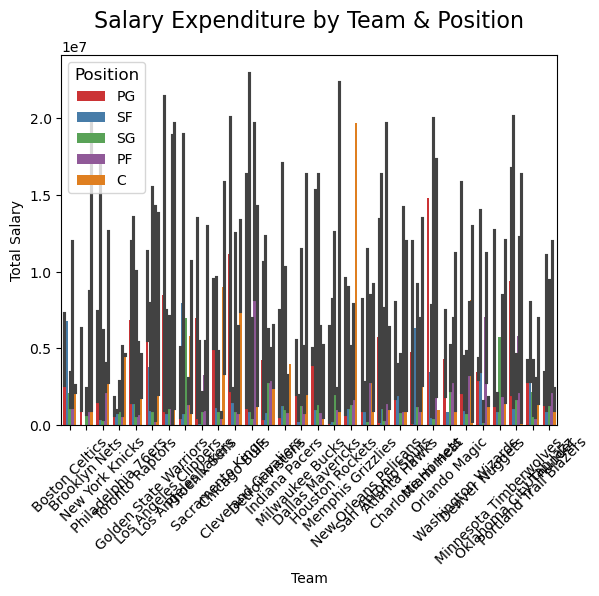

Observations:
1. Cleveland Cavaliers has the highest salary expenditure among all teams
2. C is the position with the highest salary expenditure .



In [105]:
# Highest Salary Expenditure (Team & Position)
salary_by_team = df.groupby("Team")["Salary"].sum()
highest_salary_team = salary_by_team.idxmax()
# print("Team with highest salary expenditure:", highest_salary_team)
salary_by_position = df.groupby("Position")["Salary"].sum()
highest_salary_position = salary_by_position.idxmax()
print(f"{highest_salary_team} is the team and {highest_salary_position} is the position with the highest salary expenditure.")

sns.barplot(data=df, x='Team', y='Salary', hue='Position', 
            palette='Set1')
plt.title('Salary Expenditure by Team & Position', fontsize=16, pad=20)
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.legend(title='Position', title_fontsize=12)
plt.show()
print("Observations:")
print("1. Cleveland Cavaliers has the highest salary expenditure among all teams")
print("2. C is the position with the highest salary expenditure .\n")

Correlation between Age and Salary: 0.21400941226570974


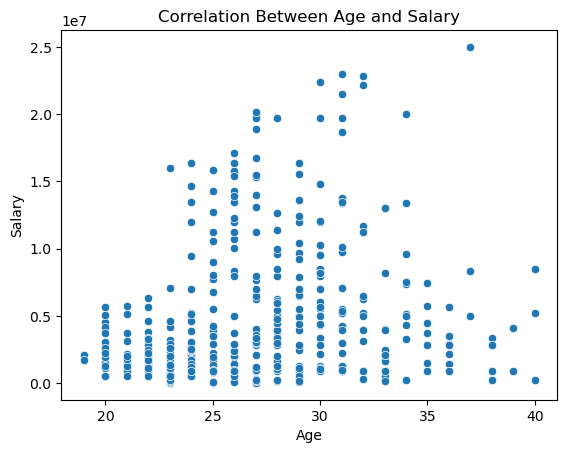

In [44]:
#Correlation Between Age and Salary
correlation = df["Age"].corr(df["Salary"])
print("Correlation between Age and Salary:", correlation)
sns.scatterplot(data=df, x="Age", y="Salary")
plt.title("Correlation Between Age and Salary")
plt.show()

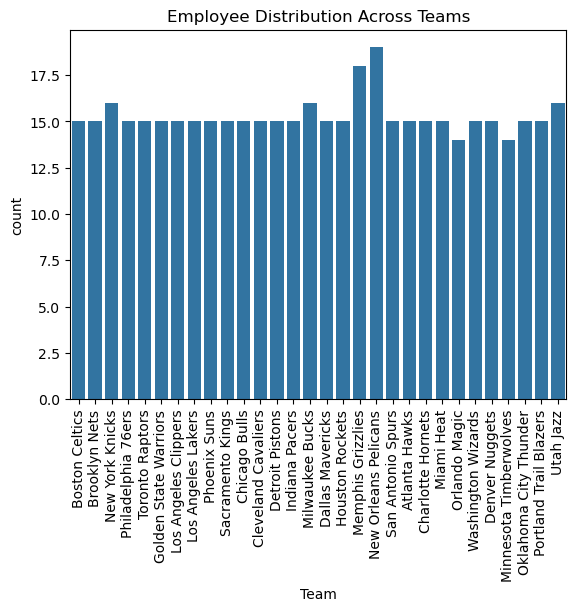